Import Libraries 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

Read Data File 

In [2]:
df = pd.read_csv("Data_Science_Challenge.csv")
df.head(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### The Dataset consists of 16 Numeric, 4 Categorical and 1 Boolean Variable. 

### We also find that the dataset does not have any null or missing values.

In [4]:
df["phone number"].nunique()

3333

In [5]:
# We see that there are no duplicate phone number values

In [6]:
df["state"].nunique()

51

In [7]:
df["area code"].nunique()

3

## We will drop the State Column as dummifying it will lead to an increase in dimensionality

In [8]:
area_code_dummies = pd.get_dummies(df["area code"])
area_code_dummies = area_code_dummies.add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


## We will convert the categorical Value in voice mail plan and international plan to numeric values 

In [10]:
df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1
df["voice mail plan"] = df["voice mail plan"].astype("int64")
df["voice mail plan"]


C:\Users\Acer\AppData\Local\Temp\ipykernel_13652\4243071869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
C:\Users\Acer\AppData\Local\Temp\ipykernel_13652\4243071869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1


0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [11]:
df["international plan"].loc[df["international plan"] == "no"] = 0
df["international plan"].loc[df["international plan"] == "yes"] = 1
df["international plan"] = df["international plan"].astype("int64")
df["international plan"]


C:\Users\Acer\AppData\Local\Temp\ipykernel_13652\2675573592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["international plan"].loc[df["international plan"] == "no"] = 0
C:\Users\Acer\AppData\Local\Temp\ipykernel_13652\2675573592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["international plan"].loc[df["international plan"] == "yes"] = 1


0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [12]:
## We will now create the final dataframe by dropping phone number (It is only a unqiue identifier and will have no predicative value in terms of predicting churn)
##,state (It will increase dimensionality) and area code (as it is already dummified).

In [13]:
df_final = df.drop(columns=["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


## We now check the Distribution of values 

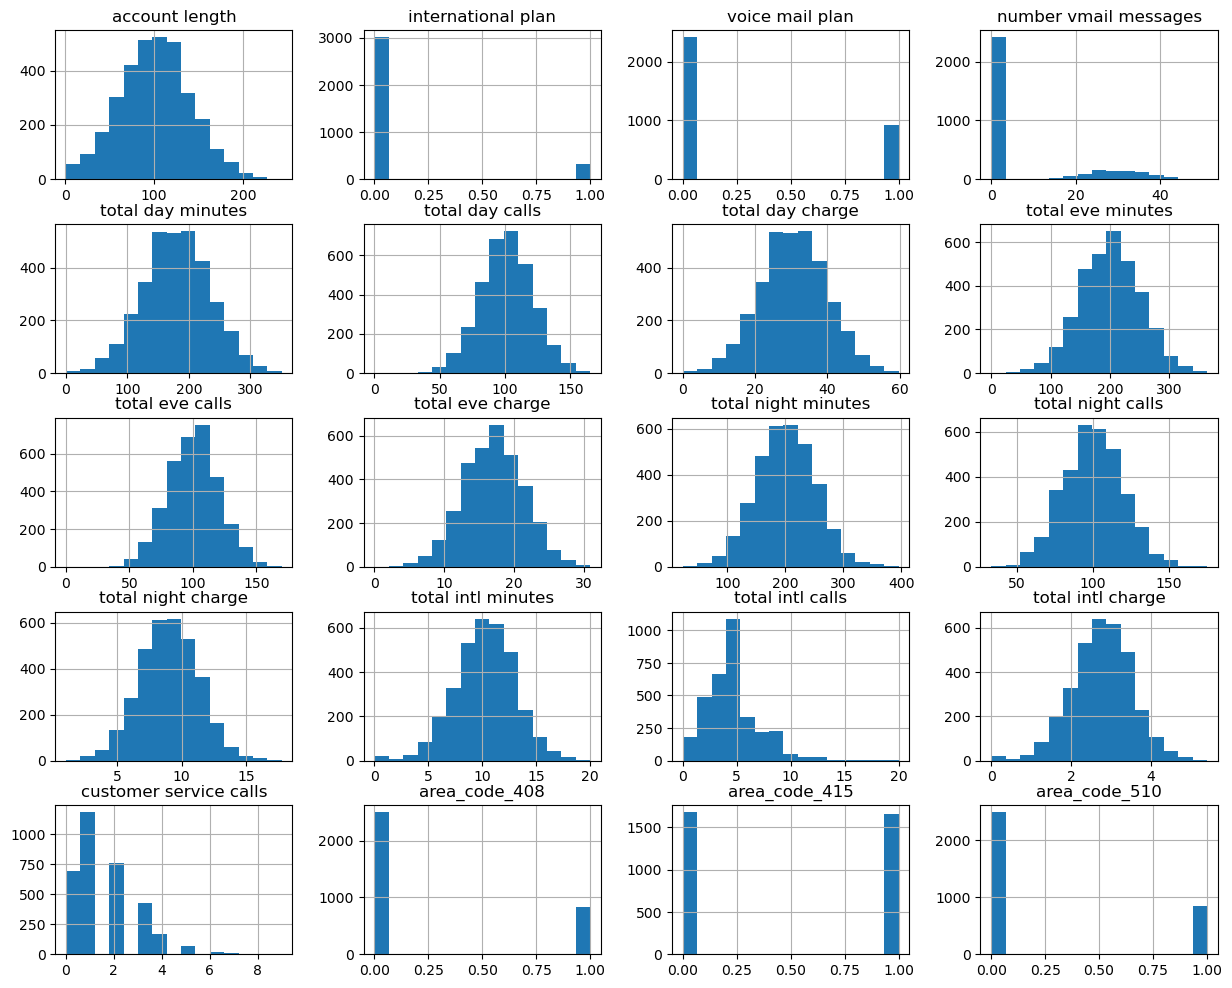

In [14]:
import matplotlib.pyplot as plt
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

We observe that - 
1. Most customers do no use international and voice plans.
2. Half of the customers live in Area code 45, with area code 510 in second place.

## We check the ratio of classes for churn 

In [15]:
df_final.groupby(['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

### We have an imbalanced dataset as Churn forms only 14.5% of the Dataset 

### Correlation Matrix

<Axes: >

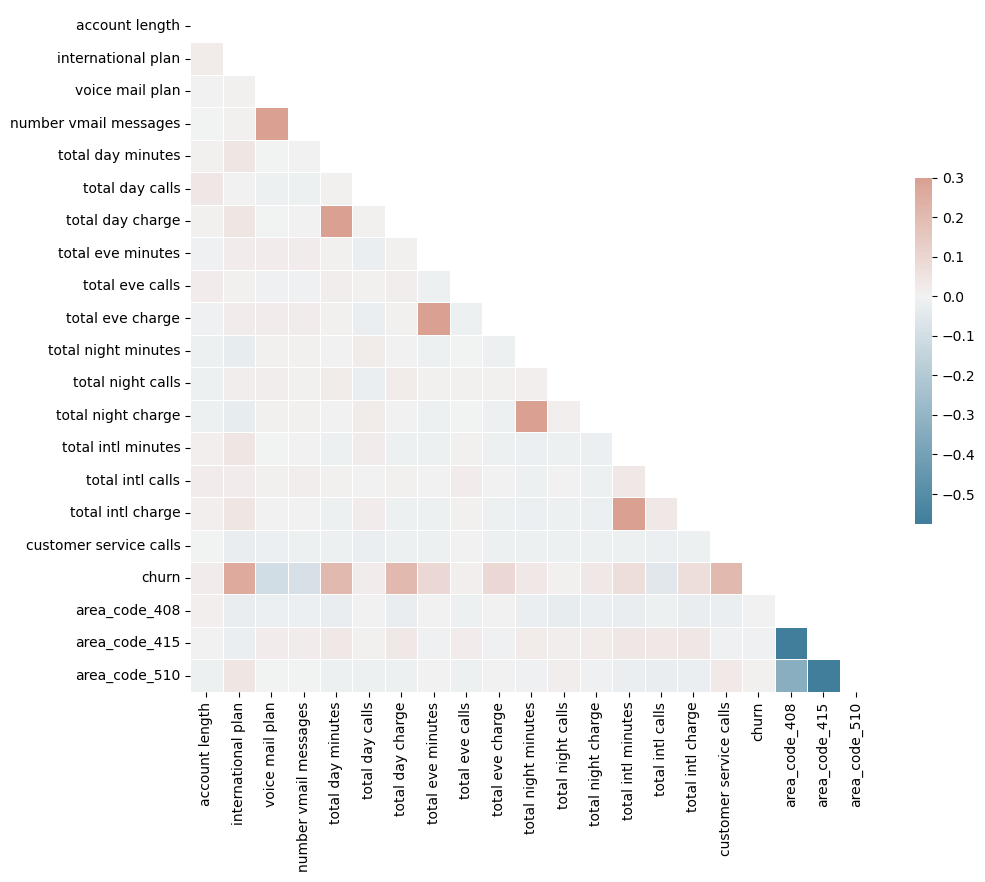

In [17]:
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Observations

From the Correlation Matrix we see that - 

#A.There is a positive correlation between:

  1.total day charge, total day minutes, and churn
  
  2.total eve minutes and total eve charge
  
  3.total night minutes and total night charge
  
  4.total intl minutes and total intl charge
  
  5.total customer service calls and churn
  
  6.number vmail messages and voice mail
  
  7.international plan and churn

#B.There is a negative correlation between:
  1.churn and voice mail plan
  
  2.churn and number vmail messages
  
  3.churn and total intl calls

## We will use label encoder to encode Churn values and drop churn column as part of X and Apply Standard Scaler only after splitting the data to avoid data leakage

In [22]:
le = preprocessing.LabelEncoder()
ss = preprocessing.StandardScaler()

In [23]:
y = le.fit_transform(df_final["churn"])
X = df_final.drop(columns=["churn"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

In [25]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [29]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2666, 20) (667, 20) (2666,) (667,)


## We now Map feature importances by gini importance

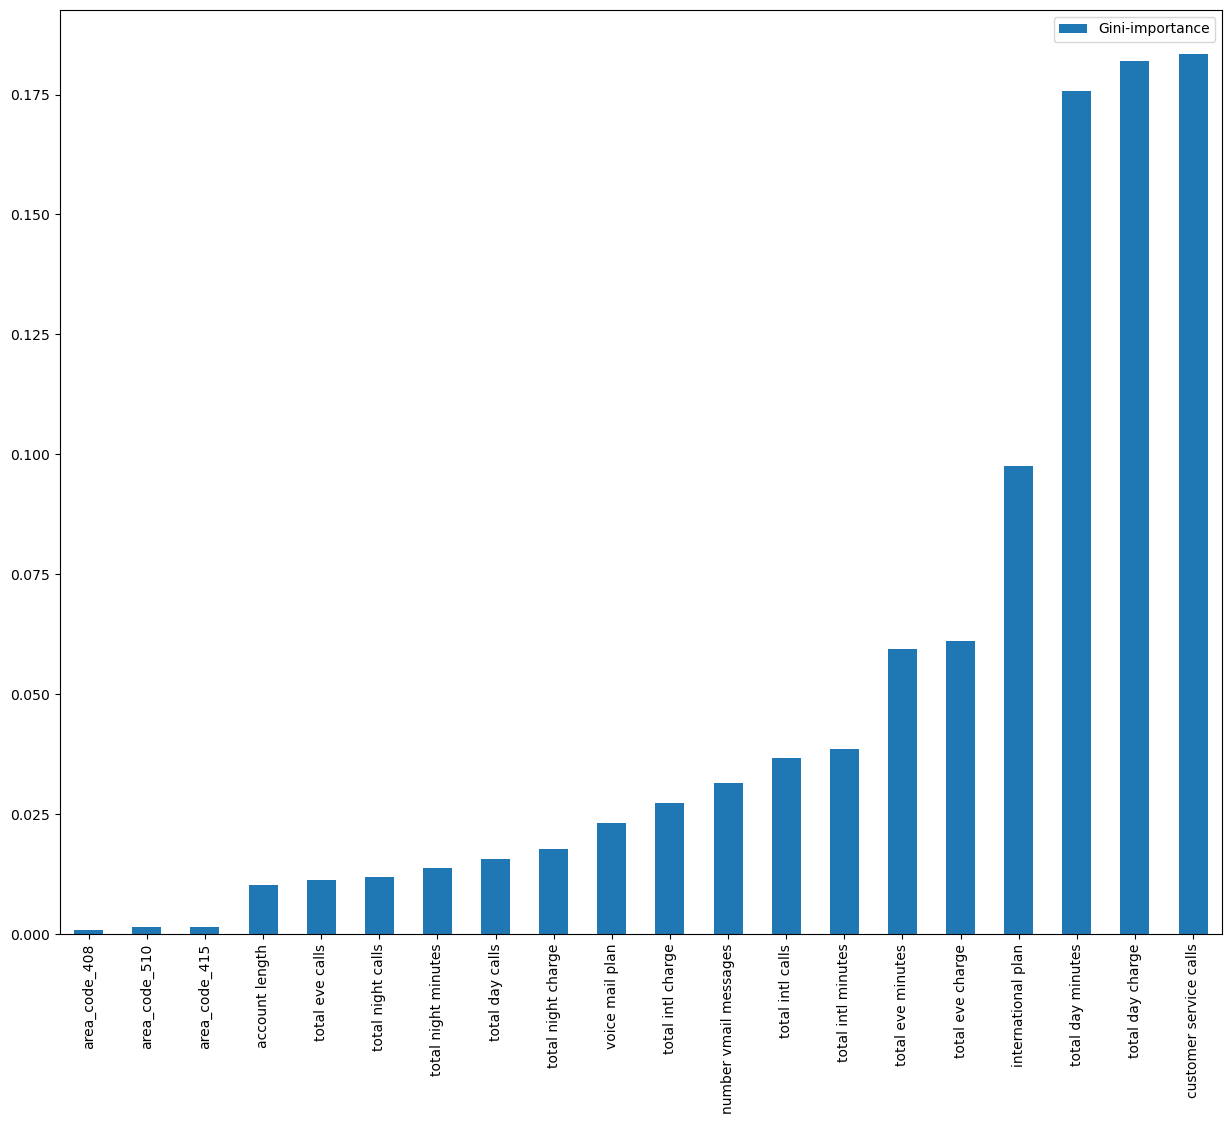

In [31]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} 
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features.

According to the analysis above, the most important three features of churn are: 

1.total day charge

2.total day minutes

3.customer service calls.


In [33]:
names = [
 "Nearest Neighbors",
 "Decision Tree",
 "Random Forest",
 "AdaBoost",
 "Naive Bayes",
 "XGBoost",
 "LightGBM"
]

classifiers = [
 KNeighborsClassifier(3),
 DecisionTreeClassifier(max_depth=5, random_state=42),
 RandomForestClassifier(max_depth=5, random_state=42),
 AdaBoostClassifier(random_state=42),
 GaussianNB(),
 XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
 LGBMClassifier(random_state=42),
]

C:\ProgramData\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [35]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    acc_score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    f_score = f1_score(y_test, y_pred, average='macro')
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.88 f1_score: 0.66 Model: Nearest Neighbors
accuracy: 0.92 f1_score: 0.83 Model: Decision Tree
accuracy: 0.91 f1_score: 0.77 Model: Random Forest
accuracy: 0.87 f1_score: 0.65 Model: AdaBoost
accuracy: 0.86 f1_score: 0.72 Model: Naive Bayes
accuracy: 0.94 f1_score: 0.86 Model: XGBoost
accuracy: 0.94 f1_score: 0.87 Model: LightGBM


### Our Top three models in terms of accuracy and F1 Score are XGBoost, LightGBM and Decision Tree, we can proceed further by hyper parameter tuning all three models.

### While we can use SHAP values and newer libraries to interpret Feature importances in Xgboost and LightGBM models, we will choose to proceed with decision tree model as it offers Clear Interpretbility 

In [40]:
def plot_decision_tree(maximum_depth,criterion_type,split_type) :
 
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
 
    graph = tree.export_graphviz(clf,out_file=None,
    rounded=True,proportion = False,
    feature_names = df_final.drop(columns=["churn"]).columns.to_list(),
    precision = 2,
    class_names=["Not churn","Churn"],
    filled = True,)
 
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)
 


accuracy: 0.94 f1_score: 0.87


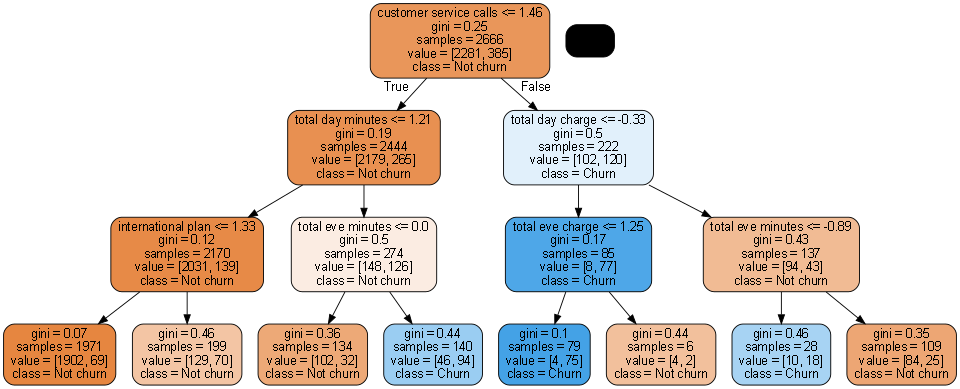

In [41]:
plot_decision_tree(3,"gini","best")
